# 01_yields_data

Xolani Sibande (April 2025)

Importing packages:

In [ ]:
library(here)


here() starts at /Users/xolanisibande-dev/Papers/US_EM_MPS_spillover

Importing functions:

In [ ]:
source(here("notebooks", "functions", "fx_plot.R"))


Import data:

In [ ]:
sheet_names <- excel_sheets(here("notebooks", "data", "yields.xlsx"))
yields_tbl <- 
  sheet_names |> 
  map(~read_excel(here("notebooks", "Data", "yields.xlsx" ), sheet = .x)) |> 
  set_names(sheet_names) |> 
  map(~rename(.x, Value = 2)) |> 
  bind_rows(.id = "Series") |> 
  drop_na() |> 
  mutate(Date = parse_date(Date, format = "%m/%d/%Y")) |> 
  relocate(Date, .before = Series) |> 
  arrange(Date) 


EDA:

In [ ]:
yields_tbl |> group_by(Series) |>  skim()


  -----------------------------------------------------------------------------------------------------------------
  skim_variable   Series     n_missing   complete_rate    mean     sd     p0    p25     p50     p75    p100 hist
  --------------- -------- ----------- --------------- ------- ------ ------ ------ ------- ------- ------- -------
  Value           Brazil             0               1   11.22   2.03   6.41   9.92   11.53   12.48   16.86 ▂▅▇▂▁

  Value           China              0               1    3.32   0.61   1.60   2.89    3.31    3.67    4.75 ▁▃▇▆▂

  Value           SA                 0               1   10.05   2.36   6.03   8.40    9.20   11.29   20.69 ▇▇▂▁▁
  -----------------------------------------------------------------------------------------------------------------


Graphing:

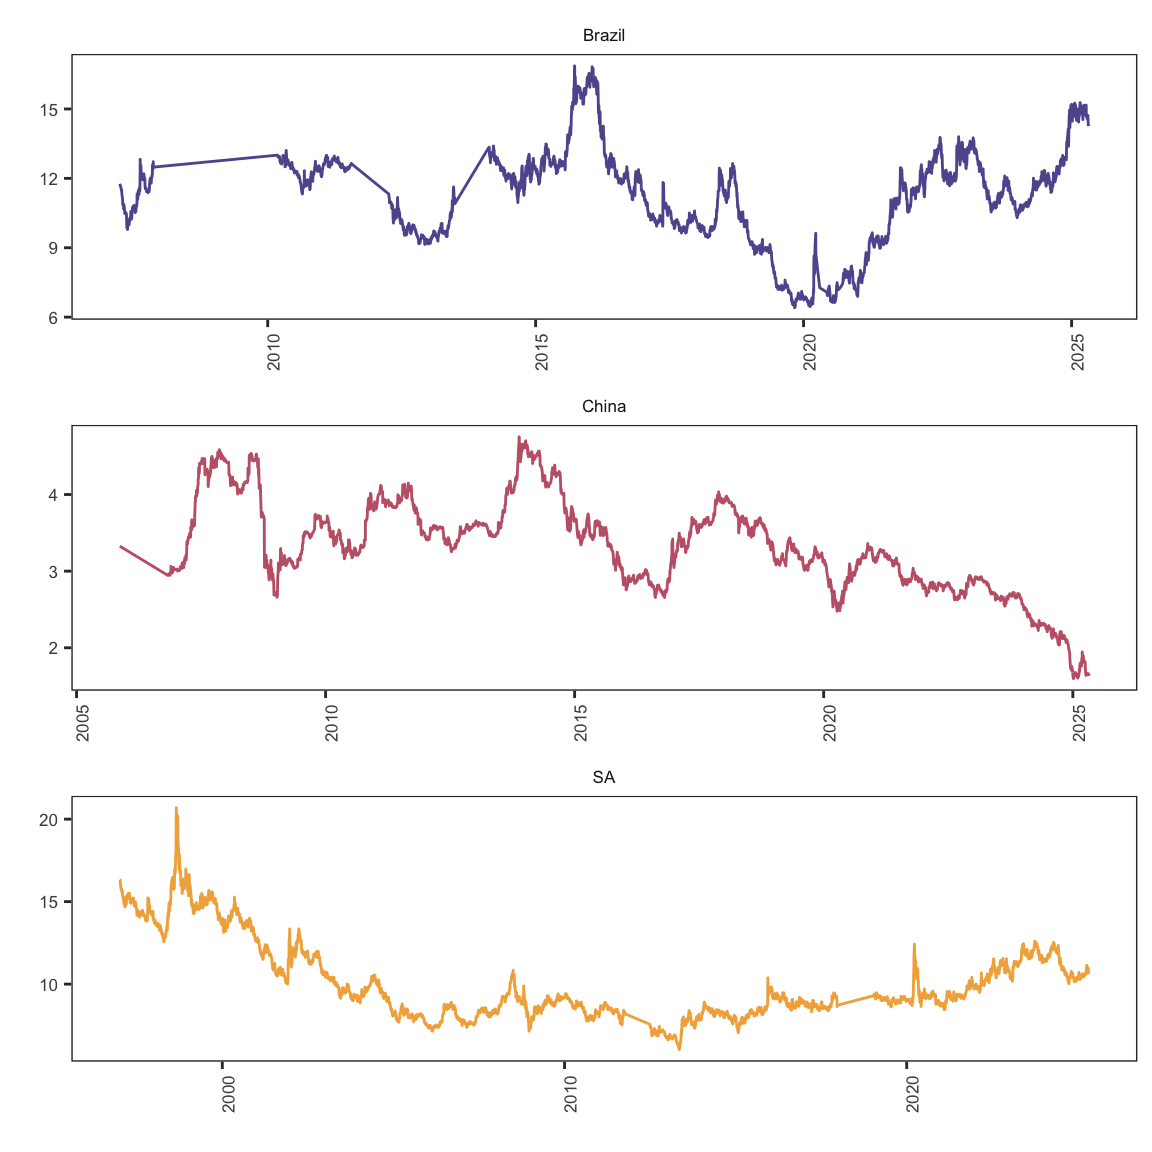

In [ ]:

yields_gg <- 
  yields_tbl |> 
  fx_plot(variables_color = 3, ncol = 1, nrow = 3)
yields_gg


Exporting:

In [ ]:
artifacts_yields_data <- list (
  yields_tbl = yields_tbl,
  yields_gg = yields_gg
)

write_rds(artifacts_yields_data, 
          file = here("notebooks", "outputs", "artifacts_yields_data.rds"))
